## 3.4.1 주성분 분석(PCA)

### pca는 주성분의 일부만 남기는 차원 축소 용도로 사용할 수 있습니다.

## PCA를 적용해 유방암 데이터셋 시각화하기

In [67]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [68]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from IPython.display import display
import mglearn

In [69]:
mglearn

<module 'mglearn' from 'c:\\users\\jpc10\\ideaprojects\\untitled\\venv\\lib\\site-packages\\mglearn\\__init__.py'>

In [70]:
import matplotlib.pyplot as plt
load_breast_cancer()
cancer=load_breast_cancer()

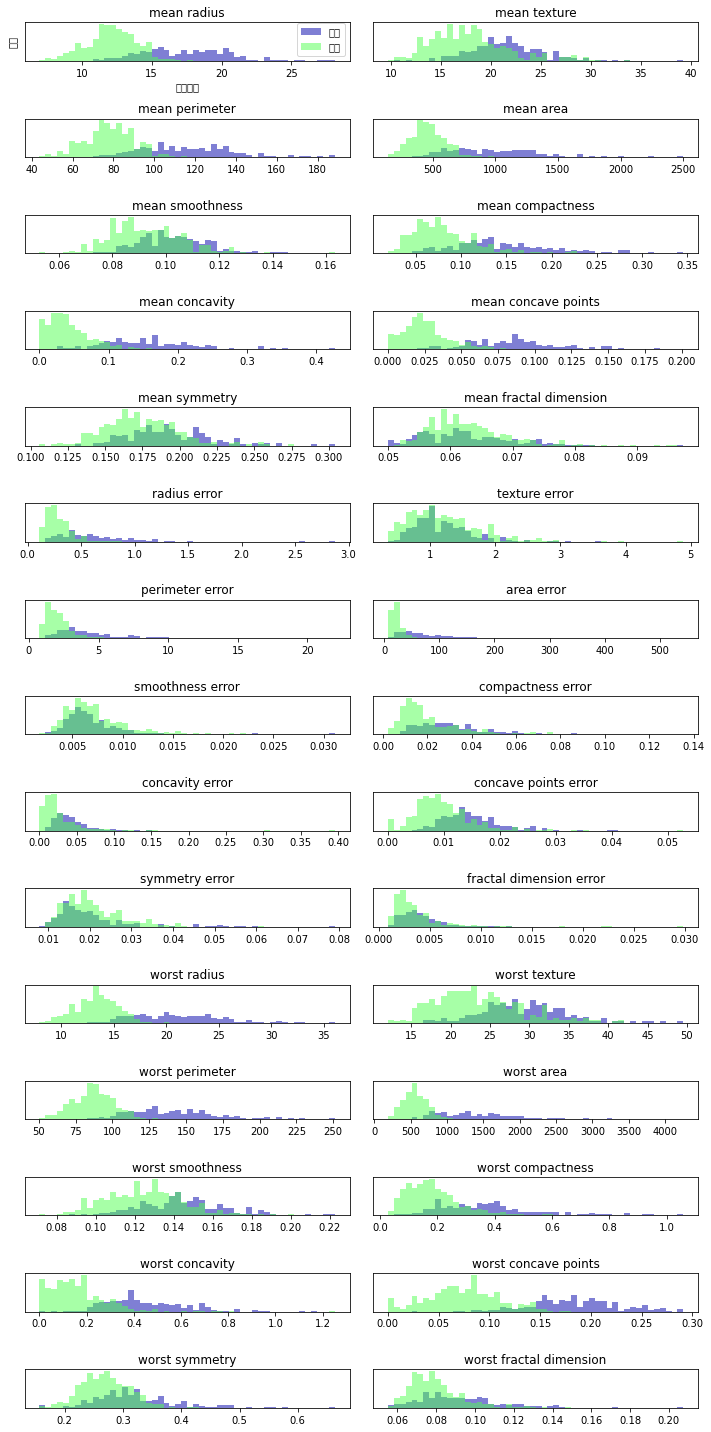

In [71]:
fig, axes=plt.subplots(15,2, figsize=(10,20))
malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]

ax=axes.ravel()

for i in range(30):
    _, bins=np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

scaler=StandardScaler()
scaler.fit(cancer.data)
X_scaled=scaler.transform(cancer.data)

In [73]:
from sklearn.decomposition import PCA
#데이터의 처음 두 개 주성분만 유지시킵니다.
pca=PCA(n_components=2)
#유방암 데이터로 PCA 모델을 만듭니다.
pca.fit(X_scaled)

#처음 두개의 주성분을 사용해 데이터를 변환합니다.
X_pca=pca.transform(X_scaled)
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터 형태:", str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, '두번째 주성분')

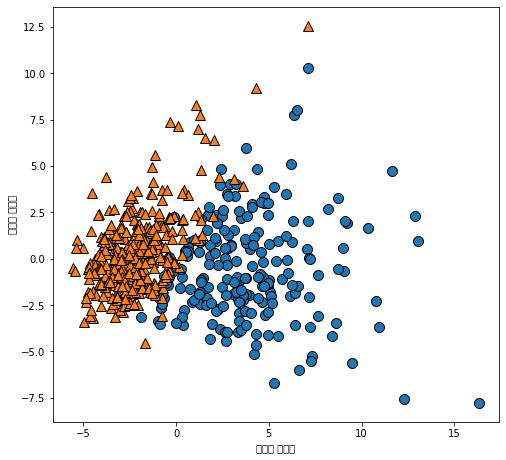

In [74]:
#클래스를 색깔로 구분하여 처음 두개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.gca().set_aspect("equal")
plt.xlabel("첫번째 주성분")
plt.ylabel("두번째 주성분")

In [76]:
print("PCA 주성분 형태:", pca.components_.shape)

PCA 주성분 형태: (2, 30)


In [77]:
print("PCA 주성분: ", pca.components_)

PCA 주성분:  [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, '주성분')

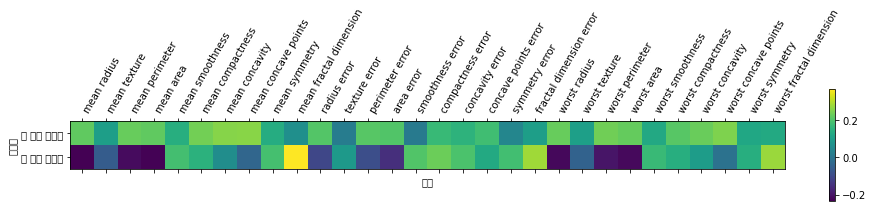

In [78]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

### 고유 얼굴 특성 추출

In [ ]:
from sklearn.datasets import fetch_lfw_people
people=fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape=people.images[0].shape

fig, axes=plt.subplots(2,5,difaize=(15,8), subplot_kw={'xticks':(), 'yticks':()})
for target, image,ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])